In [96]:
HEAD_PATH = "d:/intern"

- path of data

- Welcome to Quantitative and High Frequency Trading Training Program
- Let's start with basic data analysis with python
- you can use Shift+Enter to run each line of code

- path of our program

In [97]:
DATA_PATH = HEAD_PATH + "/pkl tick/"

- set working directory

In [98]:
import os
os.chdir(DATA_PATH)

- number of cores

In [99]:
CORE_NUM = int(os.environ['NUMBER_OF_PROCESSORS'])
CORE_NUM

16


- get working directory

In [100]:
os.getcwd()

'd:\\intern\\pkl tick'

- sample product, you can change to your specific product symbol
- for this quarter we analyze all of the black medals

In [101]:
product_list = ["rb", "hc", "i", "j", "jm"]
product = "i"

- directory of the product's data

In [102]:
dire = DATA_PATH + product
dire

'd:/intern/pkl tick/i'

- get all available data

In [103]:
all_dates = list(map(lambda x: x,os.listdir(DATA_PATH + product)))
len(all_dates)
## 915

915

- we can see that there are 915 days
- all of the products have the same trading days
- so we just take rb as an example
- get first several dates

In [104]:
all_dates[:6]
# ['20151202.pkl',
#  '20151203.pkl',
#  '20151204.pkl',
#  '20151207.pkl',
#  '20151208.pkl',
#  '20151209.pkl']


['20151202.pkl',
 '20151203.pkl',
 '20151204.pkl',
 '20151207.pkl',
 '20151208.pkl',
 '20151209.pkl']

- get last several dates

In [105]:
all_dates[-6:]
# ['20190822.pkl',
#  '20190823.pkl',
#  '20190826.pkl',
#  '20190827.pkl',
#  '20190828.pkl',
#  '20190829.pkl']

['20190822.pkl',
 '20190823.pkl',
 '20190826.pkl',
 '20190827.pkl',
 '20190828.pkl',
 '20190829.pkl']

- specify a date

In [106]:
date = "20180411"

- loading data set

In [107]:
import pandas as pd
import numpy as np
import math
import _pickle as cPickle
import gzip

with gzip.open(dire+"/"+date+".pkl", 'rb', compresslevel=1) as file_object:
    raw_data = file_object.read()
data = cPickle.loads(raw_data)

- get the column names of data

In [108]:
data.columns
## contract: contract name, product+expiration date
## date.time: date and time
## price: newest price of data
## cum.open.int: cumulative open interest
## open.int: newest open interest increment
## turnover: newest turnover increment
## qty: newest trading volume
## bid: bid price
## ask: ask price
## bid.qty: bid size
## ask.qty: ask size
## date: actual date
## time: acutal time
## milli: actual milli second
## mid.price: middle price of bid and ask
## buy.trade: active buy volume at level 1
## buy2.trade: active buy volume at other levels
## sell.trade: active sell volume at level 1
## sell2.trade: active sell volume at other levels
## log.price: log wpr (to be defined soon)
## ret: log return of last tick
## wpr: volume weighted price
## wpr.ret: price change of wpr
## high: highest price of last ask, last price, and this ask
## low: lowest price of last bid, last price, and thsi bid
## next.bid: estimated active sell price, used for backtesting
## next.ask: estimated active buy price, used for backtesting
## min.1024: rolling minimum of wpr over 1024 ticks
## max.1024: rolling maximum of wpr over 1024 ticks
## min.2048: rolling minimum of wpr over 2048 ticks
## max.2048: rolling maximum of wpr over 2048 ticks
## min.4096: rolling minimum of wpr over 4096 ticks
## max.4096: rolling maximum of wpr over 4096 ticks

## Q：关于这个数据的每个 column 的含义，能否介绍一下？一些缩写我不太了解什么含义？
## A：各名称含义如下：
## contract: 合约的名字，如 rb1605，表示螺纹钢合约，2016 年 5 月到期；
## date.time: 日期和时间合在一起，方便作图用；
## price: 最新的成交价；
## cum.open.int: 总的持仓量；
## open.int: 最新的持仓量改变量
## turnover: 最新的成交额；
## qty: 最新的成交量；
## bid: 买一价；
## ask: 卖一价；
## bid.qty: 买一量；
## ask.qty: 卖一量；
## date: 实际日期；
## time: 实际时间；
## milli: 毫秒数（上期所与中金所是 0、500，大商所随机，郑商所是 0）；
## mid.price: 买一和卖一的中间价；
## buy.trade: 一档主动买量（估算，非交易所提供）；
## buy2.trade: 其他价位主动买量（估算，非交易所提供）；
## sell.trade: 一档主动卖量（估算，非交易所提供）；
## sell2.trade: 其他价位主动买量（估算，非交易所提供）；
## log.price: wpr 的对数（wpr 下面定义）；
## ret: 最新一笔行情的对数收益率；
## wpr: 挂单量加权平均价；
## wpr.ret: wpr 的价格变化；
## min.1024: 过去 1024 笔行情的 wpr 最小值
## max.1024: 过去 1024 笔行情的 wpr 最大值；
## high: 当前 ask、前一个 ask、最新价的最高价（构造最小级别 K 线用）；
## low: 当前 bid、前一个 bid、最新价的最低价（狗仔最小级别 K 线用）；
## next.bid: 主动卖单的成交价（估算，非交易所提供），用于回测；
## next.ask: 主动买单的成交价（估算，非交易所提供），用于回测；
## min.1024: 1024跳滚动最低价
## max.1024: 1024跳滚动最高价
## min.2048: 2048跳滚动最低价
## max.2048: 2048跳滚动最高价
## min.4096: 4096滚动最低价
## max.4096: 4096滚动最高价

Index(['contract', 'date.time', 'price', 'cum.open.int', 'open.int',
       'turnover', 'qty', 'bid', 'ask', 'bid.qty', 'ask.qty', 'date', 'time',
       'milli', 'good', 'mid.price', 'buy.trade', 'buy2.trade', 'sell.trade',
       'sell2.trade', 'log.price', 'ret', 'min.1024', 'max.1024', 'min.2048',
       'max.2048', 'min.4096', 'max.4096', 'wpr', 'wpr.ret', 'next.ask',
       'next.bid'],
      dtype='object')

- plot the price

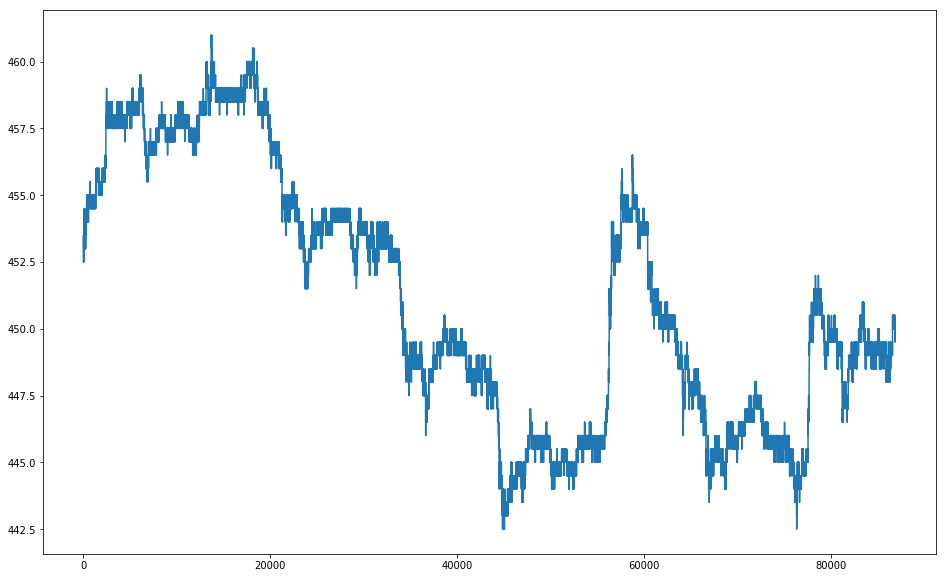

In [109]:
# pip install plotly
import matplotlib.pyplot as plt

plt.figure(1, figsize=(16, 10))
plt.plot(data["price"].values);

- specific a range of price
- you can see the lines are wider than rb because the bid/ask spread is larger and the move is less frequent

In [114]:
range_ = (data["time"] >="09:00:00") & (data["time"]<"15:00:02") 

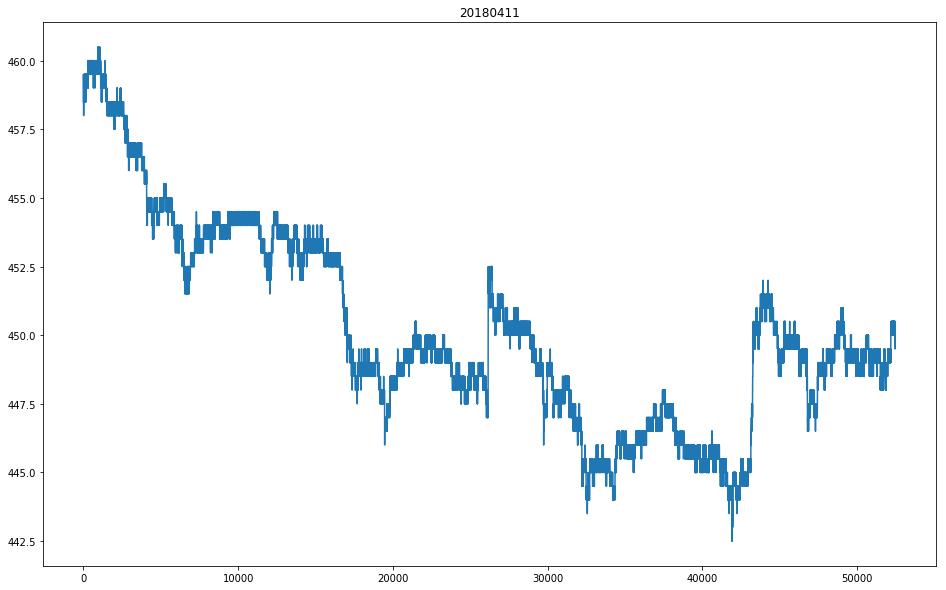

In [115]:
plt.figure(1, figsize=(16, 10))
plt.title(date)
plt.plot(data["price"][range_].values);

- add time

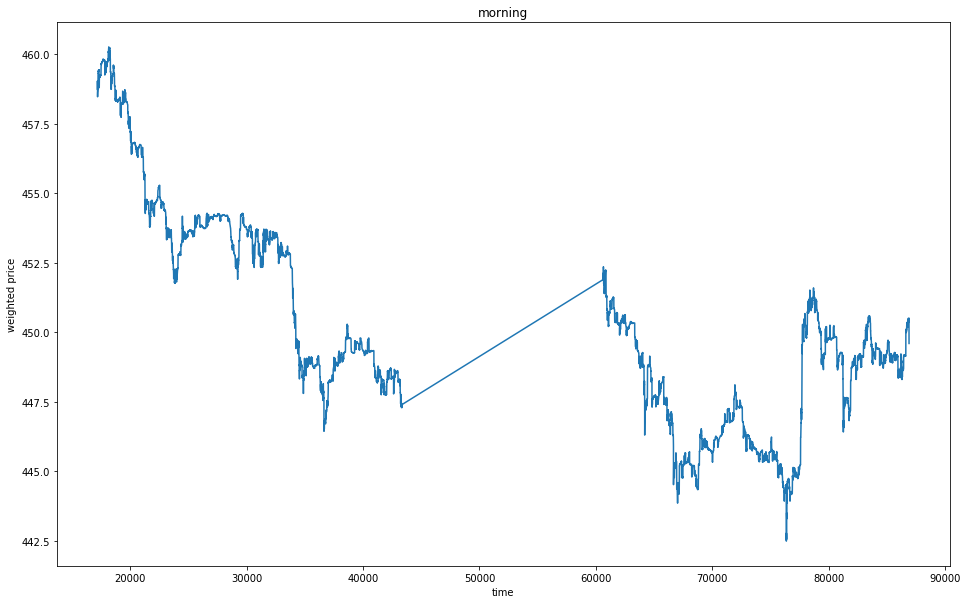

In [116]:
plt.figure(1, figsize=(16, 10))
plt.title("morning")
plt.xlabel("time")
plt.ylabel("weighted price")
plt.plot(data.index[range_].values, data["wpr"][range_].values);
## there is a break between 11:30 and 13:30

- plot price change

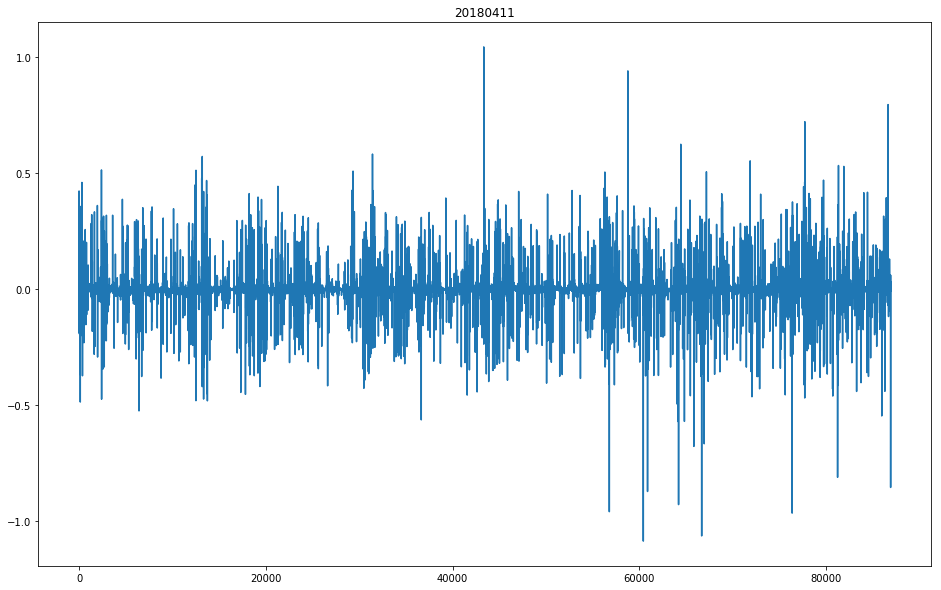

In [117]:
plt.figure(1, figsize=(16, 10))
plt.title(date)
data["wpr.ret"].values[0]=0
plt.plot(data["wpr.ret"].values);

- plot price log return

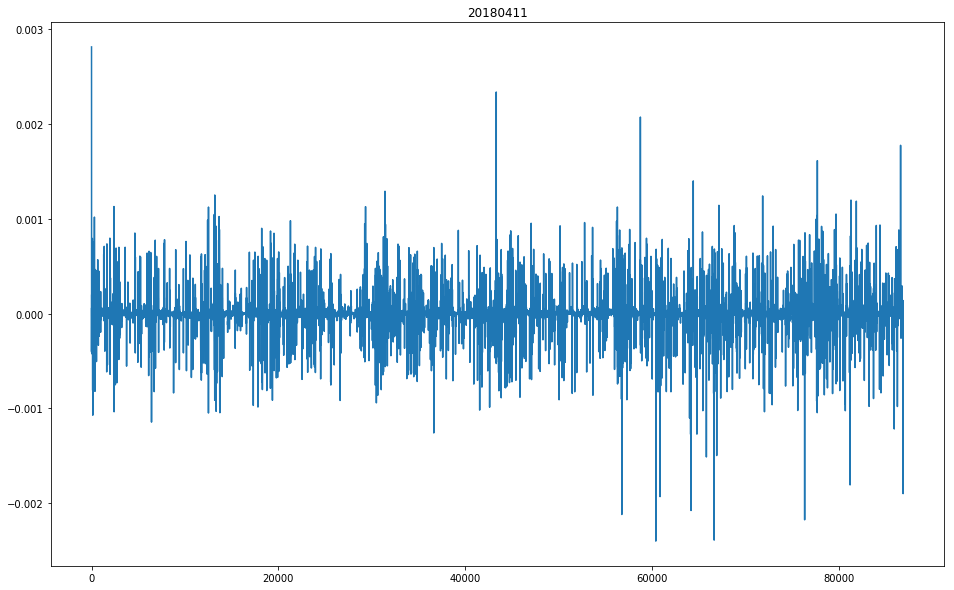

In [118]:
plt.figure(1, figsize=(16, 10))
plt.title(date)
plt.plot(data["ret"].values);

- count the number of rising ticks

In [120]:
sum(data['ret']>0)
## 42977

42977

- count the number of falling ticks

In [122]:
sum(data['ret']<0)
## 43111

43111

- count the number of total ticks

In [124]:
len(data)
## 86904

86904

- formula to calculate wpr:

In [125]:
wpr = (data["bid"]*data["ask.qty"]+data["ask"]*data["bid.qty"])/(data["bid.qty"]+data["ask.qty"])

- upper limit or lower limit

In [126]:
limit = (data["ask.qty"]==0) | (data["bid.qty"]==0)

- in this case, one of bid and ask price is zero, so using newest price as wpr

In [127]:
wpr[limit] = data["price"][limit]

In [128]:
wpr.head()
# 0    452.268080
# 1    452.532567
# 2    452.608429
# 3    453.032601
# 4    453.170423
# dtype: float64

0    452.268080
1    452.532567
2    452.608429
3    453.032601
4    453.170423
dtype: float64

In [129]:
data["wpr"].head()
# 0    3429.368217
# 1    3430.997788
# 2    3431.373134
# 3    3432.195072
# 4    3431.302326
# Name: wpr, dtype: float64

0    452.268080
1    452.532567
2    452.608429
3    453.032601
4    453.170423
Name: wpr, dtype: float64

In [130]:
sum(abs(wpr - data["wpr"]) > 0.00000001)
## 0

0

- stationary test for return series

- load related package

In [131]:
import statsmodels.tsa.stattools as ts

In [132]:
result = ts.adfuller(data["ret"][data["good"]], maxlag=int(pow(len(data["ret"][data["good"]])-1,(1/3))), regression='ct', autolag=None)
result
# (-34.31638866742725,
#  0.0,
#  35,
#  43394,
#  {'1%': -3.958978640714957,
#   '5%': -3.4105911800768687,
#   '10%': -3.1271095863589937})

## for this test the smaller the value the more stationary, we want to reject the hull hypothesis to make it stationary
## so it's stationary

(-34.31638866742725,
 0.0,
 35,
 43394,
 {'1%': -3.958978640714957,
  '5%': -3.4105911800768687,
  '10%': -3.1271095863589937})

In [163]:
result = ts.kpss(data["ret"][data["good"]], regression='c', lags=int(3*math.sqrt(len(data["ret"][data["good"]]))/13))
result

# (0.4943797730291568,
#  0.04293248355199171,
#  48,
#  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
## for KPSS test, small value means level stationary, large value means trend
## it's not stationary under 5% but very close
## we want to accpect the hypthesis to make it stationary
    

(0.4943797730291568,
 0.04293248355199171,
 48,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

- get price movements of 120 ticks, it's about 1 minute

In [164]:
ret_120 = (data["ret"].rolling(120).sum()).dropna().reset_index(drop=True)

- check correctness

In [135]:
sum(data["ret"][0:120])
## 0.0072255760426873684

0.0072255760426873684

In [136]:
ret_120.iloc[0]
## 0.0072255760426873684

0.0072255760426873684

- plot the price movements of 120 ticks

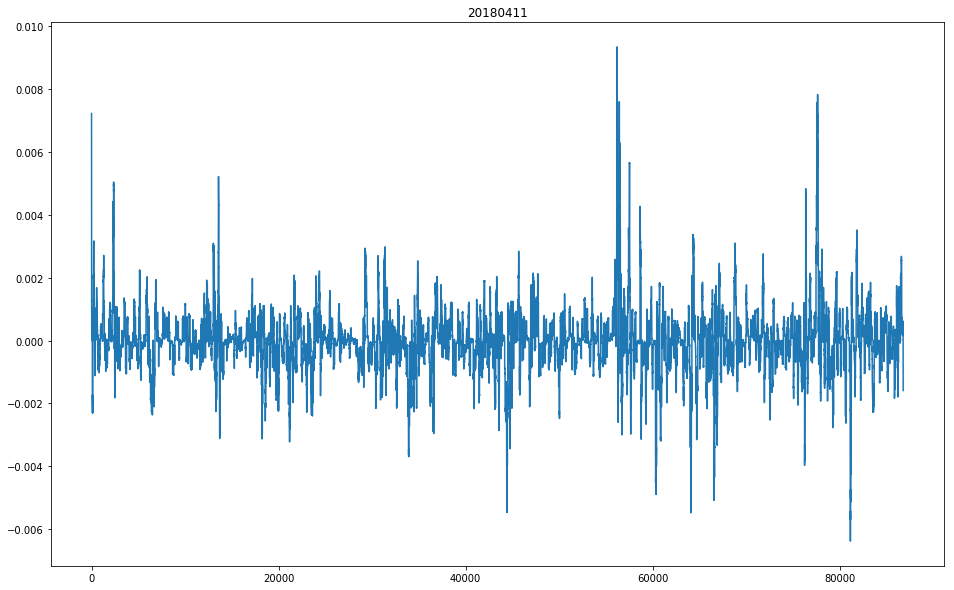

In [137]:
plt.figure(1, figsize=(16, 10))
plt.title(date)
plt.plot(ret_120.values);

In [139]:
len(ret_120)
## 86785

86785

In [140]:
len(data)
## 86904

86904

In [141]:
range_120 = ((np.mod(np.arange(0, len(data)),120)==0) & data["good"])[119:]

In [143]:
len(ret_120)
## 86785

86785

In [144]:
ret_120.iloc[np.where(range_120)]
## we get a sample of ret_120, 1 out of 120 points to keep them independent

17161    0.001429
17281   -0.000452
17401    0.000896
17521    0.000224
17641    0.000102
17761   -0.000234
17881   -0.000114
18001    0.000987
18121   -0.000416
18241   -0.002453
18361    0.000967
18481    0.000208
18601   -0.002042
18721    0.000050
18841   -0.000103
18961    0.000141
19081   -0.001423
19201    0.001019
19321    0.000083
19441    0.000128
19561   -0.000034
19681   -0.000857
19801   -0.000440
19921   -0.001078
20041   -0.001034
20161    0.000125
20281    0.000044
20401   -0.000409
20521   -0.000634
20641    0.000742
           ...   
57001    0.000634
57121    0.000644
57241   -0.001034
57361    0.000965
57481    0.003188
57601    0.000212
57721   -0.000954
57841    0.000945
57961   -0.000346
58081    0.000076
58201   -0.000105
58321   -0.000485
58441   -0.000041
58561   -0.000092
58681    0.003285
58801   -0.001407
58921   -0.000819
59041   -0.000168
59161   -0.000621
59281   -0.002295
59401    0.001004
59521   -0.000442
59641   -0.000138
59761    0.000329
59881    0

- test whether ret.120 is stationary

In [165]:
result = ts.adfuller(ret_120.iloc[np.where(range_120)], maxlag=int(pow(len(ret_120.iloc[np.where(range_120)])-1,(1/3))), regression='ct', autolag=None)
result

# (-6.4790110376571075,
#  2.051837234779144e-07,
#  7,
#  354,
#  {'1%': -3.9845736034419112,
#   '5%': -3.422965388419206,
#   '10%': -3.1343857801105925})

(-6.4790110376571075,
 2.051837234779144e-07,
 7,
 354,
 {'1%': -3.9845736034419112,
  '5%': -3.422965388419206,
  '10%': -3.1343857801105925})

In [166]:
result = ts.kpss(ret_120.iloc[np.where(range_120)], regression='c', lags=int(3*math.sqrt(len(ret_120.iloc[np.where(range_120)]))/13))
result

# (0.35082121943024763,
#  0.09835292265937602,
#  4,
#  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

## it's still stationary under 5%

(0.35082121943024763,
 0.09835292265937602,
 4,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

- we can check longer period

In [148]:
ret_2000 = (data["ret"].rolling(2000).sum()).dropna().reset_index(drop=True)

- plot the price change

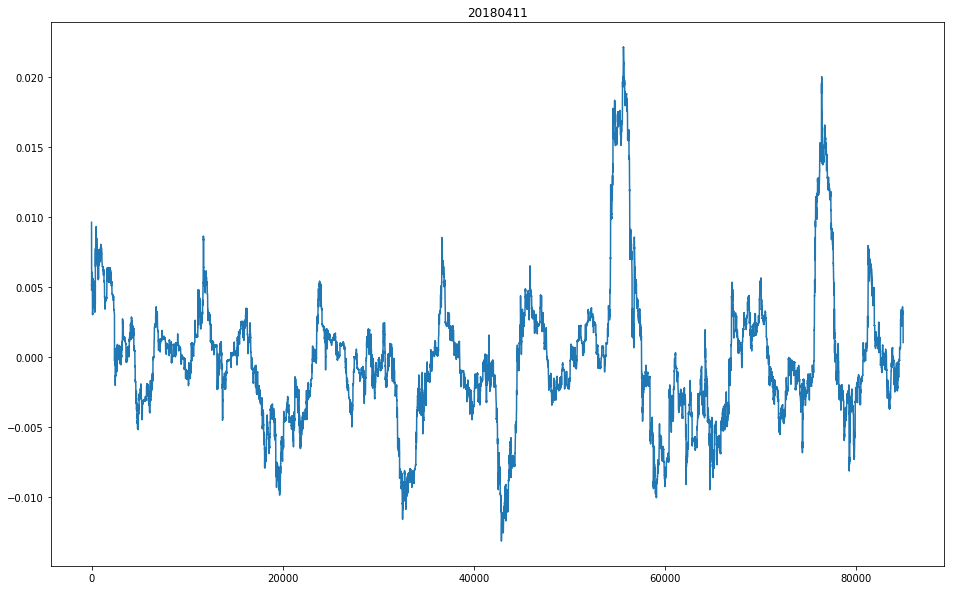

In [149]:
plt.figure(1, figsize=(16, 10))
plt.title(date)
plt.plot(ret_2000.values);

In [151]:
sum((np.mod(np.arange(1, len(data)+1),2000)==0) & (data["good"]))
## 22

22

- So there are too few points to test for stationary

In [152]:
import pandas as pd
import _pickle as cPickle
import gzip

In [153]:
def load(path):
    with gzip.open(path, 'rb', compresslevel=1) as file_object:
        raw_data = file_object.read()
    return cPickle.loads(raw_data)

- there may be too few data
- we can check for more days

In [154]:
def get_sample_ret(date, period):
    data = load(DATA_PATH + product+"/"+date)
    ret = (data["ret"].rolling(period).sum()).dropna().reset_index(drop=True)
    range = ((np.mod(np.arange(0, len(data)),period)==0) & data["good"])[(period-1):]
    return ret.iloc[np.where(range)]


In [155]:
import functools
import dask
from dask import compute, delayed
def parLapply(CORE_NUM, iterable, func, *args, **kwargs):
    with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
        f_par = functools.partial(func, *args, **kwargs)
        result = compute([delayed(f_par)(item) for item in iterable])[0]
    return result

In [156]:
%%time
result = parLapply(CORE_NUM, all_dates, get_sample_ret, period=4096)
;

# Wall time: 2min 9s

Wall time: 2min 9s


In [157]:
from itertools import chain 

In [158]:
ret_long = list(chain.from_iterable(result)) 

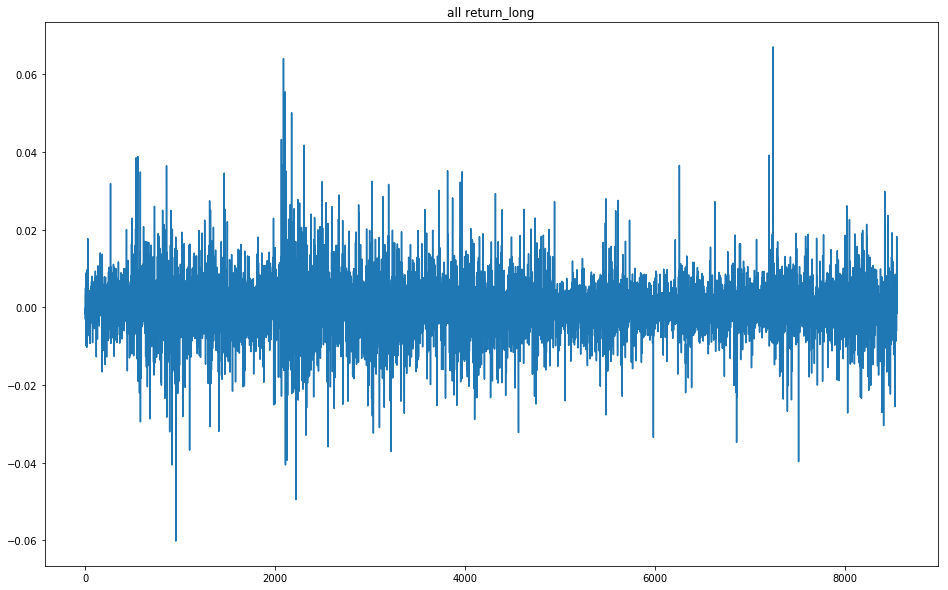

In [159]:
plt.figure(1, figsize=(16, 10))
plt.title("all return_long")
plt.plot(ret_long);

In [161]:
result = ts.adfuller(ret_long, maxlag=int(pow(len(ret_long)-1,(1/3))), regression='ct', autolag=None)
result

# (-19.779978503701596,
#  0.0,
#  20,
#  8531,
#  {'1%': -3.959831591157048,
#   '5%': -3.4110047649536197,
#   '10%': -3.127353136841432})

## the value is -18.54
## it's still stationary

(-19.779978503701596,
 0.0,
 20,
 8531,
 {'1%': -3.959831591157048,
  '5%': -3.4110047649536197,
  '10%': -3.127353136841432})

In [167]:
result = ts.kpss(ret_long, regression='c', lags=int(3*math.sqrt(len(ret_long))/13))
result

# (0.1957520694991875,
#  0.1,
#  21,
#  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

## p-value is 0.1 so it's stationary

d:\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


(0.1957520694991875,
 0.1,
 21,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

- we can see that, it's still stationary for 4096 ticks


- check simple strategy


- set triger threshold

In [168]:
threshold = 0.001
len(ret_long)
# 8552

8552


- make up the return series to match uo with original data

- plot price series

- number of ticks above the threshold, to be long position

In [169]:
sum(np.array(ret_long)>threshold)
## 3715

3715

- number of ticks below negetive threshold, to be short position

In [170]:
sum(np.array(ret_long)< -threshold)
## 3415

3415

- set position


- number of ticks

## ############## The following part is bad example of trading ##########

- set position just the sanme as signal

In [171]:
from collections import OrderedDict
def get_daily_pnl_fast(date, product="rb", period=4096, threshold=0.001, tranct=1.1e-4, noise=0):
    with gzip.open(dire+"/"+date, 'rb', compresslevel=1) as file_object:
        raw_data = file_object.read()
    ori_data = cPickle.loads(raw_data)
    data=ori_data[ori_data["good"]]
    n_bar = len(data)
    unit = np.std(data["ret"])
    np.random.seed(10)
    ##  we repeat the above code to get daily result
    ret_long = (data["ret"].rolling(period).sum()).dropna().reset_index(drop=True)
    ret_long = ret_long.append(pd.Series([0]*(len(data)-len(ret_long)))).reset_index(drop=True)
    signal = pd.Series([0] * n_bar)
    signal[(ret_long>threshold) & (np.array(data["next.ask"])>0)] = 1
    signal[(ret_long< -threshold) & (np.array(data["next.bid"])>0)] = -1
    position=signal
    position[0]=0
    position[n_bar-1] = 0
    position[n_bar-2] = 0
    change_pos = position - position.shift(1)
    change_pos[0] = 0
    change_base = np.zeros(n_bar)
    change_buy = ((change_pos>0) & (np.array(data["next.ask"])>0))
    change_sell = ((change_pos<0) & (np.array(data["next.bid"])>0))
    change_base[change_buy] = (np.array(data["next.ask"])[change_buy])*(1+tranct)
    change_base[change_sell] = (np.array(data["next.bid"])[change_sell])*(1-tranct)
    final_pnl = -sum(change_base*change_pos)
    turnover = sum(change_base*abs(change_pos))
    num = sum((position!=0) & (change_pos!=0))
    hld_period = sum(position!=0)  
    ## finally we combine the statistics into a data frame
    #result = pd.DataFrame({"final.pnl": final_pnl, "turnover": turnover, "num": num, "hld.period": hld_period}, index=[0])
    #result = {"date": date, "final.pnl": final_pnl, "turnover": turnover, "num": num, "hld.period": hld_period}
    result = OrderedDict([("date", date), ("final.pnl", final_pnl), ("turnover", turnover), ("num", num), ("hld.period", hld_period)])
    return result

- we try one day as an example

In [172]:
import dask
from dask import compute, delayed

get_daily_pnl_fast(all_dates[0], product="i", period=4096, threshold=0.001, tranct=1.1e-4)
# OrderedDict([('date', '20151202.pkl'),
#              ('final.pnl', -18.377115000001936),
#              ('turnover', 35246.50159499999),
#              ('num', 60),
#              ('hld.period', 25635)])

OrderedDict([('date', '20151202.pkl'),
             ('final.pnl', -18.377115000001936),
             ('turnover', 35246.50159499999),
             ('num', 60),
             ('hld.period', 25635)])

- Then we use it for all days

In [173]:
%%time
import functools
with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
    f_par = functools.partial(get_daily_pnl_fast, product="i", period=4096, threshold=0.001, tranct=1.1e-4, noise=0)
    result = compute([delayed(f_par)(date) for date in all_dates])[0]
    
## Wall time: 39.5 s

Wall time: 39.5 s


- Now we can use a function to check its performance

In [174]:
from collections import OrderedDict
def get_performance(result, spread=1):
    aa = pd.DataFrame(result)
    aa.set_index("date", inplace=True)
    col_names = aa.columns
    row_names = aa.index
    stat = aa.values
    stat = np.array(np.rec.fromrecords(aa.values))
    np_names = aa.dtypes.index.tolist()
    stat.dtype.names = tuple([name for name in np_names])
    stat = pd.DataFrame(stat)
    pnl = stat["final.pnl"].cumsum()
    date_str = [n[0:8] for n in row_names]
    date_format = [pd.to_datetime(d) for d in date_str]
    plt.figure(1, figsize=(16, 10))
    plt.title("")
    plt.xlabel("date")
    plt.ylabel("pnl")
    plt.plot(date_format, pnl)
    n_days = len(stat)
    num = stat["num"].mean()
    if num==0:
        return;
    if (stat["final.pnl"].std()==0):
        sharpe = 0
    else:
        sharpe = stat["final.pnl"].mean()/stat["final.pnl"].std()*math.sqrt(250)
    drawdown = max(pnl.cummax()-pnl)/pnl.iloc[-1]
    mar = 1/drawdown
    win_ratio = sum(stat["final.pnl"]>0)/n_days
   
    avg_pnl = sum(stat["final.pnl"])/sum(stat["num"])/spread
    hld_period = sum(stat["hld.period"])/sum(stat["num"])
    return OrderedDict([("sharpe", sharpe), ("drawdown", drawdown), ("mar", mar), ("win.ratio", win_ratio)
                        , ("num", num), ("avg.pnl", avg_pnl), ("hld.period", hld_period)])

,sharpe,drawdown,mar,win.ratio,num,avg.pnl,hld.period
0,-23.401641,-0.999278,-1.000723,0.03388,86.876503,-0.640104,328.54374


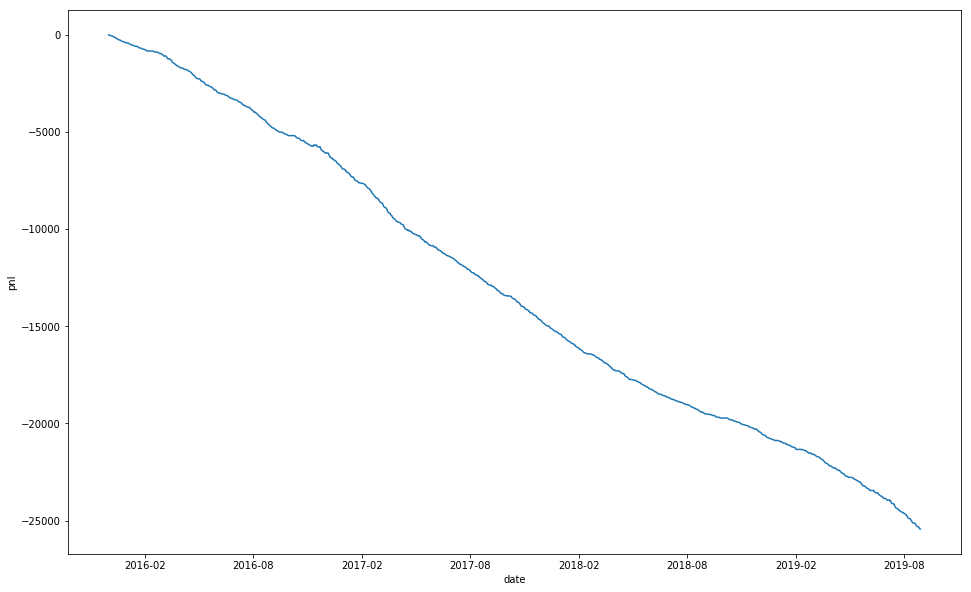

In [175]:
## the spread of i is 0.5

pd.DataFrame(get_performance(result, 0.5), index=[0])

# sharpe 	drawdown 	mar 	win.ratio 	num 	avg.pnl 	hld.period
# 0 	-23.401641 	-0.999278 	-1.000723 	0.03388 	86.876503 	-0.640104 	328.54374

- we can see it's really bad
- we can try increasing threshold

In [176]:
%%time
import functools
with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
    f_par = functools.partial(get_daily_pnl_fast, product="i", period=4096, threshold=0.01, tranct=1.1e-4, noise=0)
    result_2 = compute([delayed(f_par)(date) for date in all_dates])[0]
    
## Wall time: 39.3 s

Wall time: 39.3 s


,sharpe,drawdown,mar,win.ratio,num,avg.pnl,hld.period
0,-10.634197,-0.999488,-1.000512,0.136612,24.03388,-0.557149,180.477741


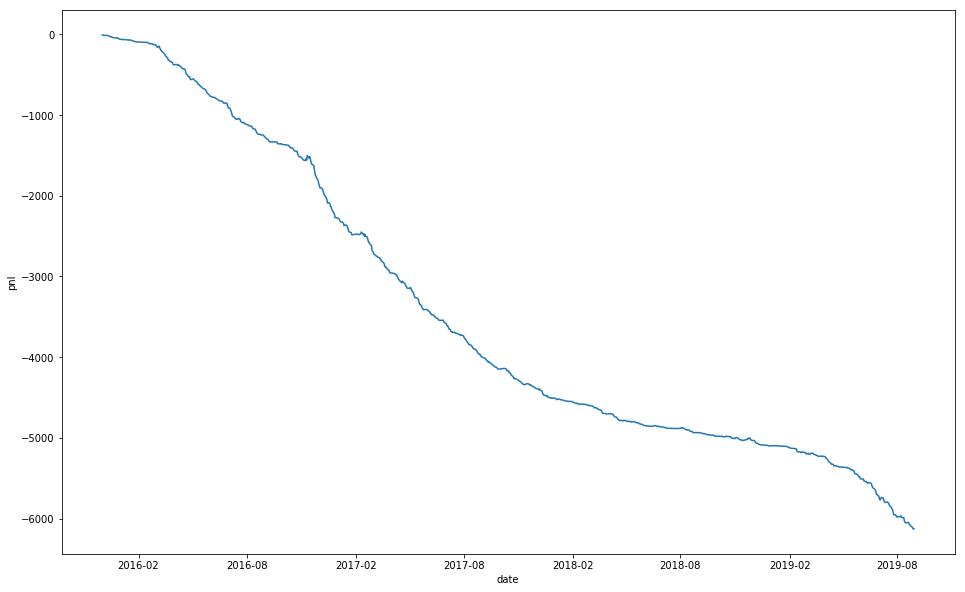

In [179]:
pd.DataFrame(get_performance(result_2, 0.5), index=[0])

# sharpe 	drawdown 	mar 	win.ratio 	num 	avg.pnl 	hld.period
# -10.634197 	-0.999488 	-1.000512 	0.136612 	24.03388 	-0.557149 	180.477741


In [178]:
%%time
import functools
with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
    f_par = functools.partial(get_daily_pnl_fast, product="i", period=4096, threshold=0.02, tranct=1.1e-4, noise=0)
    result_3 = compute([delayed(f_par)(date) for date in all_dates])[0]

Wall time: 39.2 s


,sharpe,drawdown,mar,win.ratio,num,avg.pnl,hld.period
0,-3.567884,-1.020557,-0.979857,0.089617,4.533333,-0.419662,149.104388


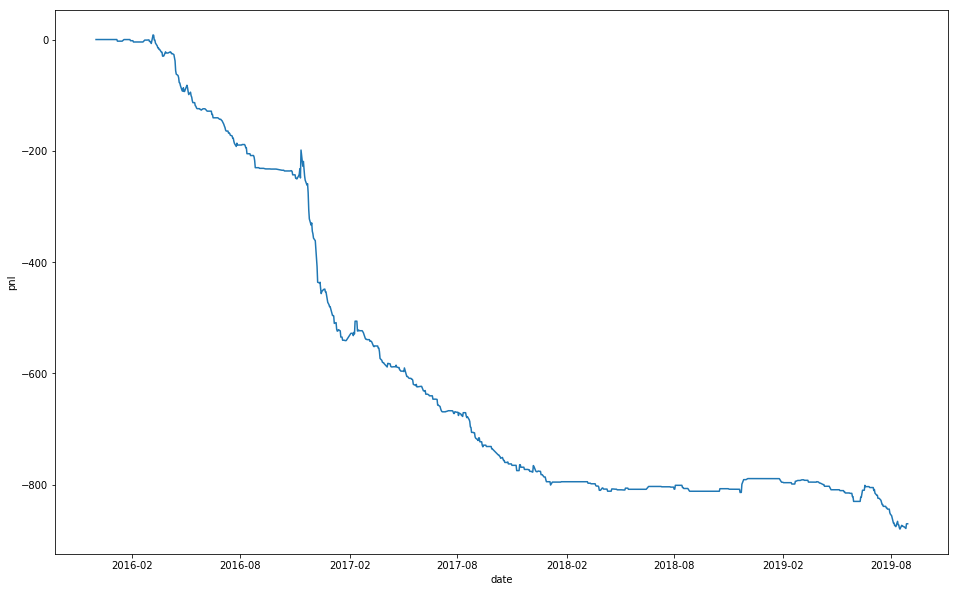

In [180]:
pd.DataFrame(get_performance(result_3, 0.5), index=[0])
# sharpe 	drawdown 	mar 	win.ratio 	num 	avg.pnl 	hld.period
# 0 	-3.567884 	-1.020557 	-0.979857 	0.089617 	4.533333 	-0.419662 	149.104388

- Although it's profitable there are very few trades.
- Now we use a different scheme.
- In previous scheme, we close our position when the value is not strong enough.
- It may close the positions too soon that it cannot cover transaction cost on average
- So we change our backtest method to make it holding positions longer

In [182]:
from collections import OrderedDict
def get_daily_pnl(date, product="rb", period=2000, threshold=0.001, tranct=1.1e-4, noise=0):
    with gzip.open(dire+"/"+date, 'rb', compresslevel=1) as file_object:
        raw_data = file_object.read()
    data = cPickle.loads(raw_data)
    data = data[data["good"]].reset_index(drop=True)
    n_bar = len(data)
    unit = np.std(data["ret"])
    np.random.seed(10)
    noise_ret = np.random.normal(scale=unit*noise, size=n_bar)
    ##  we repeat the above code to get daily result
    ret_2000 = (data["ret"].rolling(period).sum()).dropna().reset_index(drop=True)
    ret_2000 = ret_2000.append(pd.Series([0]*(len(data)-len(ret_2000)))).reset_index(drop=True) + noise_ret
    signal = pd.Series([0] * n_bar)
    signal[ret_2000>threshold] = 1
    signal[ret_2000< -threshold] = -1
    position_pos = pd.Series([np.nan] * n_bar)
    position_pos[0] = 0
    position_pos[(signal==1) & (data["next.ask"]>0) & (data["next.bid"]>0)] = 1
    position_pos[(ret_2000< -threshold) & (data["next.bid"]>0)] = 0
    position_pos.ffill(inplace=True)
    position_neg = pd.Series([np.nan] * n_bar)
    position_neg[0] = 0
    position_neg[(signal==-1) & (data["next.ask"]>0) & (data["next.bid"]>0)] = -1
    position_neg[(ret_2000> threshold) & (data["next.ask"]>0)] = 0
    position_neg.ffill(inplace=True)
    position = position_pos + position_neg
    position[0]=0
    position[n_bar-1] = 0
    position[n_bar-2] = 0
    change_pos = position - position.shift(1)
    change_pos[0] = 0
    change_base = pd.Series([0] * n_bar)
    change_buy = change_pos>0
    change_sell = change_pos<0
    change_base[change_buy] = (data["next.ask"][change_buy])*(1+tranct)
    change_base[change_sell] = (data["next.bid"][change_sell])*(1-tranct)
    final_pnl = -sum(change_base*change_pos)
    turnover = sum(change_base*abs(change_pos))
    num = sum((position!=0) & (change_pos!=0))
    hld_period = sum(position!=0)
  
    ## finally we combine the statistics into a data frame
    #result = pd.DataFrame({"final.pnl": final_pnl, "turnover": turnover, "num": num, "hld.period": hld_period}, index=[0])
    #result = {"date": date, "final.pnl": final_pnl, "turnover": turnover, "num": num, "hld.period": hld_period}
    result = OrderedDict([("date", date), ("final.pnl", final_pnl), ("turnover", turnover), ("num", num), ("hld.period", hld_period)])
    return result

- we use the parallel libary here

In [183]:
%%time
import functools
with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
    f_par = functools.partial(get_daily_pnl, product="i", period=4096, threshold=0.001, tranct=1.1e-4, noise=0)
    result_4 = compute([delayed(f_par)(date) for date in all_dates])[0]
    
## Wall time: 51 s

Wall time: 50.5 s


- the col names and row names are opposite

,sharpe,drawdown,mar,win.ratio,num,avg.pnl,hld.period
0,21.714155,0.000508,1969.373742,0.984699,17.519126,2.063128,2190.046475


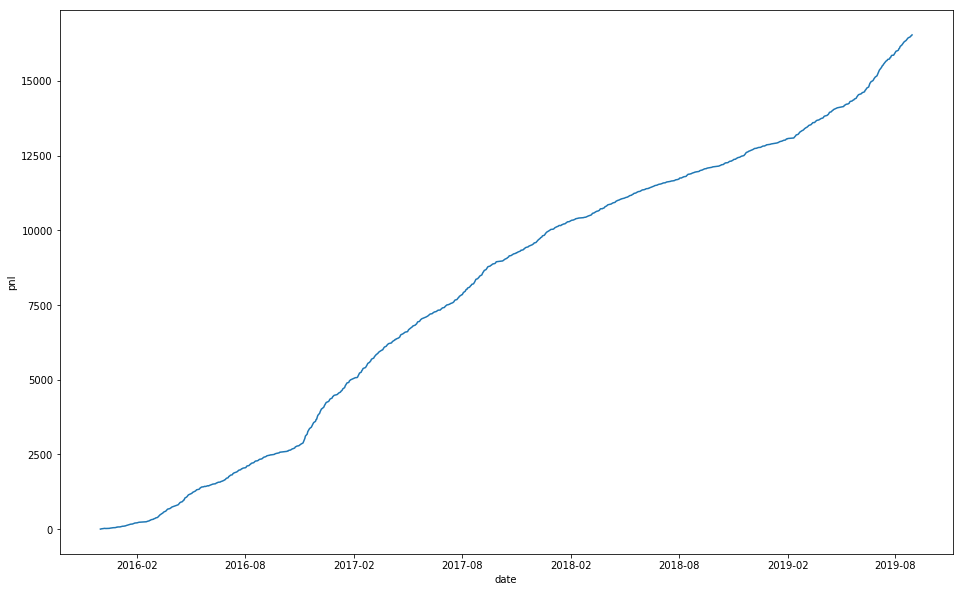

In [184]:
pd.DataFrame(get_performance(result_4,0.5), index=[0])
# sharpe 	drawdown 	mar 	win.ratio 	num 	avg.pnl 	hld.period
# 21.714155 	0.000508 	1969.373742 	0.984699 	17.519126 	2.063128 	2190.046475

- we can see it's much better than before.
- Keep in mind that it uses future data here so the result is not realistic
- we just want to show that this scheme is much better than the previous one
- and we would use this backtest method in the future course

In [185]:
%%time
import functools
with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
    f_par = functools.partial(get_daily_pnl, product="i", period=4096, threshold=0.002, tranct=1.1e-4, noise=5)
    result_5 = compute([delayed(f_par)(date) for date in all_dates])[0]

# Wall time: 51.9 s

Wall time: 49.1 s


,sharpe,drawdown,mar,win.ratio,num,avg.pnl,hld.period
0,4.255705,0.118645,8.428495,0.947541,25.797814,0.97258,1487.343783


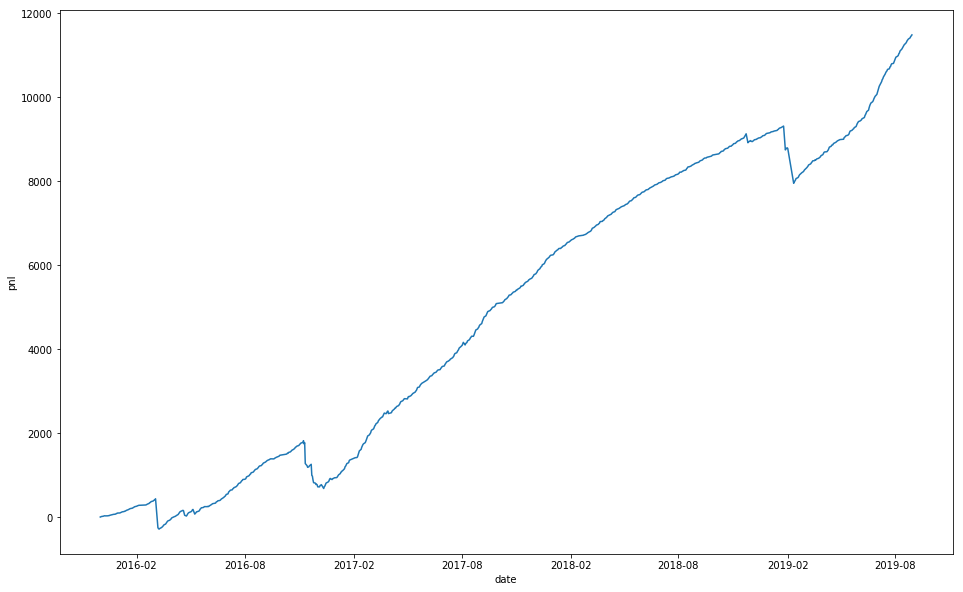

In [186]:
pd.DataFrame(get_performance(result_5,0.5), index=[0])
# sharpe 	drawdown 	mar 	win.ratio 	num 	avg.pnl 	hld.period
# 4.255705 	0.118645 	8.428495 	0.947541 	25.797814 	0.97258 	1487.343783

- After adding some noise, the result is worse than before but still pretty good
- the later courses we would use this backtest method to test our signals and straregies without any future data
- the reuslt would be much worse than the previous ones but they are realistic
- Homework
- You can try this method on other products: hc, j, jm and comapre their results|